In [1]:

%pprint

Pretty printing has been turned OFF



## Plot Coherence by Number of Topics

In [2]:

%%time
%run ../py/html_analysis.py

lda = LdaUtilities(verbose=True)

Wall time: 9.33 s


In [3]:

%%time
from gensim.models import CoherenceModel

# Compute Coherence Scores
y = []
x = [1_000, 5_000, 7_500, 8_000, 8_500]
for keep_n in x:
    lda.build_dictionary()
    lda.LDA_DICTIONARY.filter_extremes(no_below=100, no_above=0.5, keep_n=8_500)
    lda.build_corpus()
    lda.build_topic_model()
    y.append(CoherenceModel(model=lda.TOPIC_MODEL, texts=lda.tokenized_sents_list, corpus=lda.LDA_CORPUS,
                            dictionary=lda.LDA_DICTIONARY).get_coherence())

Wall time: 7min 33s


In [6]:

from gensim.models.ldamodel import LdaModel

LdaModel?

Init signature:
LdaModel(
    corpus=None,
    num_topics=100,
    id2word=None,
    distributed=False,
    chunksize=2000,
    passes=1,
    update_every=1,
    alpha='symmetric',
    eta=None,
    decay=0.5,
    offset=1.0,
    eval_every=10,
    iterations=50,
    gamma_threshold=0.001,
    minimum_probability=0.01,
    random_state=None,
    ns_conf=None,
    minimum_phi_value=0.01,
    per_word_topics=False,
    callbacks=None,
    dtype=<class 'numpy.float32'>,
)
Docstring:     
Train and use Online Latent Dirichlet Allocation (OLDA) models as presented in
`Hoffman et al. :"Online Learning for Latent Dirichlet Allocation" <https://www.di.ens.fr/~fbach/mdhnips2010.pdf>`_.

Examples
-------
Initialize a model using a Gensim corpus

.. sourcecode:: pycon

    >>> from gensim.test.utils import common_corpus
    >>>
    >>> lda = LdaModel(common_corpus, num_topics=10)

You can then infer topic distributions on new, unseen documents.

.. sourcecode:: pycon

    >>> doc_bow = [(1, 0.3),

In [4]:

sorted([(tn, cv) for tn, cv in zip(x, y)], key=lambda x: x[1], reverse=True)

[(5000, 0.649207121013271), (8500, 0.6278934608305464), (7500, 0.6015753961458301), (8000, 0.5885030571006837), (1000, 0.5000100775758947)]

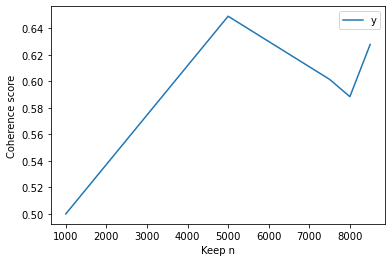

In [5]:

# Show graph
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel('Keep n')
plt.ylabel('Coherence score')
plt.legend(('y'), loc='best')
plt.show()